## 1.Big Data분석기초_연습_05_탐색적분석_통계(추검정)

0. pytnon 패키지 불러오기

In [60]:
# 데이터 구성 패키지: Series, DataFrame
import pandas as pd
# 행렬 연산 패키지
import numpy as np

# 데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 가설검정 및 통계 분석 패키지
import scipy.stats as stats
from statsmodels.formula.api import ols

# 그래프 표시
%matplotlib inline

In [61]:
import matplotlib    
import matplotlib.font_manager

[f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]
 # ['NanumBarunGothic',
 # 'NanumMyeongjo',
 # 'NanumMyeongjo',
 # 'NanumGothic',
 # 'NanumBarunGothic',
 # 'NanumGothic']

['NanumGothic',
 'NanumMyeongjo',
 'NanumMyeongjo',
 'NanumBarunGothic',
 'NanumSquare',
 'NanumSquareRound',
 'NanumBarunGothic',
 'NanumGothic',
 'NanumSquareRound',
 'NanumSquare']

In [62]:
import matplotlib as mpl
import matplotlib.pyplot as plt
# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'

In [63]:
# 실행결과 경고메시지 출력 제외
import warnings
warnings.filterwarnings('ignore')

### 1. 연습 (정규성 검정)
   - 실습파일  camshaft 데이터 불러온다 
   - 변수 Supp1에 대해 정규성을 검정( data set : camshaft )

In [64]:
# 가설검정 및 통계 분석 패키지 가져오기
# from scipy.stats import shapiro

In [65]:
# camshaft 데이터 가져오기
df = pd.read_csv("/home/piai/바탕화면/01 실습파일/1 Big Data 분석 기초/camshaft.csv")
df.head()

,Length,Supp1,Supp2
0,601.4,598.0,601.6
1,601.6,599.8,600.4
2,598.0,600.0,598.4
3,601.4,599.8,600.0
4,599.4,600.0,596.8


In [66]:
stats.normaltest(df['Supp1'])

NormaltestResult(statistic=2.2562877208229604, pvalue=0.3236334080481965)

In [67]:
# 정규성 검정 : Shapiro-Wilk Test
statistic, p = stats.shapiro(df['Supp1'])

In [68]:
print("Shapiro-Wilk Test: statistic={}, p-value={}".format(statistic, p))

Shapiro-Wilk Test: statistic=0.9788166284561157, p-value=0.1074606254696846


In [69]:
# 정규성 검정 : perform Anderson-Darling Test 
statistic  = stats.anderson(df['Supp1'])

In [70]:
print("Anderson Test: statistic={}, p-value={}".format(statistic, p))

Anderson Test: statistic=AndersonResult(statistic=0.8444390379245448, critical_values=array([0.555, 0.632, 0.759, 0.885, 1.053]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=599.548, scale=0.61929904983886)
 success: True
 message: '`anderson` successfully fit the distribution to the data.'), p-value=0.1074606254696846


- ※ 정규성 검정에서는 p-value가 유의수준 0.05보다 클 경우 표본이 정규분포를 따른다고 판단할 수 있습니다. 
- ※ 따라서 p-value 0.107은 유의수준 5% 보다 크므로 표본이 정규분포를 따른다고 할 수 있습니다

### 2. 연습 (모평균 구간추정)
  - 새로운 품종의 배추 40통을 랜덤추출하여 무게를 측정할 결과가 다음과 같음
  - (단,모표준편차는 0.397) 이 자료로부터 신품종 배추의 평균 무게에 대한 95% 신뢰구간을 구하시오.

In [71]:
# 데이터 직접입력
df = pd.DataFrame({'wgt':[3.6, 2.9, 2.8, 2.6, 3.4, 3.2, 2.2, 2.6, 
                          2.6, 2.4, 2.4, 2.6, 3.4, 2.4, 2.1, 2.6, 
                          3.0, 2.4, 2.7, 2.4, 2.6, 2.9, 2.9, 2.0, 
                          2.7, 2.2, 2.8, 2.7, 1.8, 2.5, 3.0, 3.2, 
                          2.8, 2.6, 3.2, 3.1, 2.9, 2.7, 2.7, 2.2]})
df.head()

,wgt
0,3.6
1,2.9
2,2.8
3,2.6
4,3.4


In [72]:
statistic, p = stats.shapiro(df)
print("Shapiro-Wilk Test: statistic={}, p-value={}".format(statistic, p))

Shapiro-Wilk Test: statistic=0.9854053258895874, p-value=0.8764940500259399


In [73]:
# 모평균 신뢰구간 추정 : (loc: 평균의 값, scale: 변동 정도)  
# 정규분포 구간 추정 함수 실행 (신뢰수준:0.95, 표본평균: 2.70, 모표준편차:0.397 )

lower, upper = stats.norm.interval(0.95, loc = np.mean(df), 
                                   scale = 0.397/np.sqrt(40))
print("신뢰구간: ({0}, {1})" .format(lower.round(2), upper.round(2)))

신뢰구간: ([2.57], [2.82])


### 2. 연습 (모평균 신뢰구간 추정 - 모표준편차를 모르는 경우) 
  - 제품개발자는 새로 개발된 강종의 평균 인장강도를 55 kg/mm2으로 기대하고 있음. 이를 검증하기 위해 시험 생산되는 강종 중 임의로 20개의 코일을 대상으로 랜덤하게 시편을 채취하였음. 

In [74]:
# df를 직접 입력 
df = pd.DataFrame({'streng':[54.1, 53.3, 56.1, 55.7, 54.0, 54.1, 54.5, 
                             57.1, 55.2, 53.8, 54.1, 54.1, 56.1, 55.0, 
                             55.9, 56.0, 54.9, 54.3, 53.9, 55.0]})
df.head()

,streng
0,54.1
1,53.3
2,56.1
3,55.7
4,54.0


In [75]:
# t 분포 구간추정 함수 실행 : (loc: 평균의 값, scale: 변동 정도)  
lower, upper = stats.t.interval(0.95, len(df)-1, loc = np.mean(df), 
                                scale = stats.sem(df))
print("신뢰구간: ({0}, {1})" .format(lower.round(2), upper.round(2)))

신뢰구간: ([54.39], [55.33])


### 3. 연습 (1-Sample t-test) : 모표준편차를 모를 때
  - 고객서비스센터의 고객만족도 평균은 76.7이다. 개선활동을 완료한 후 다음과 같은 10개의 고객만족도 데이터를 얻었다.  개선활동이 만족도를 변화시켰는가? ( α =0.05 )
  - 데이터 : 74.5, 81.2, 73.8, 82.0, 76.3, 75.7, 80.2, 72.6, 77.9, 82.8
   (Mean =  77.7   S = 3.66)

In [76]:
# df를 직접 입력 
df = pd.DataFrame({'satisfaction': [74.5, 81.2, 73.8, 82.0, 76.3, 75.7, 80.2, 72.6, 
                                    77.9, 82.8]})
df.head()

,satisfaction
0,74.5
1,81.2
2,73.8
3,82.0
4,76.3


<Axes: >

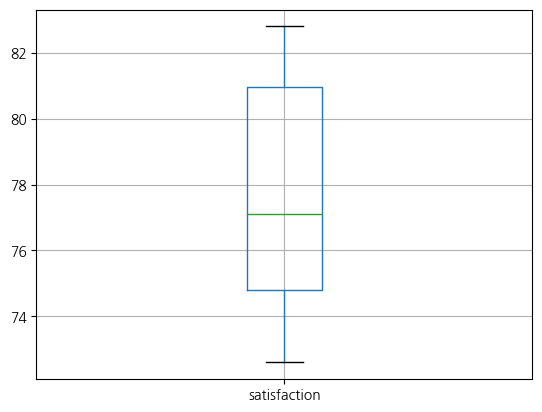

In [77]:
# boxplot
df.boxplot()

In [78]:
# 정규성 검정: Shapiro-Wilk Test
statistic, p = stats.shapiro(df)
print("statistic={}, p-value={}".format(statistic, p))

statistic=0.9331594705581665, p-value=0.4796782433986664


※ 결론 : 정규분포를 따른다고 할 수 있다

In [79]:
# 1-Sample t-test
t_result = stats.ttest_1samp(df, 76.7)

# t값, p값 
t, p = t_result.statistic, t_result.pvalue

In [80]:
# 1-Sample t-test의 t값 p값 출력
print( " 1-Sample t-test ")
print( "  t검정 통계량 : {} " .format(t)) ; print( "  p-value : {} " .format(p))

 1-Sample t-test 
  t검정 통계량 : [0.86437028] 
  p-value : [0.40983028] 


※ 결론 : 유의수준 5%에서 검정결과, P값이 0.41이므로 개선활동으로 고객만족도 변화를 시켰다고 할 수 없다

### 4. 연습 (2-Sample t-test) : 두 집단 간 평균이 같은지 검정
  - 고객만족도 확인을 위하여 A고객과 B고객에 대해 Survey하여 다음의 데이터를 얻었다.A고객과 B고객의 모평균에 차이가 있다고 할 수 있는가?  (유의수준 α = 0.05)


In [81]:
# 데이터 가져오기 ( data set : 2sample.csv ) 
# Data직접 입력 
df = pd.DataFrame({'A': [6, 5, 5, 4, 6, 7, 6, 4, 5, 6, 4, 5, 5, 6, 4, 8, 6, 5, 6, 7], 
                   'B': [7, 6, 7, 8, 7, 8, 8, 5, 7, 6, 5, 5, 6, 6, 5, 7, 9, 7, 7, 8]})
df.head()

,A,B
0,6,7
1,5,6
2,5,7
3,4,8
4,6,7


<Axes: >

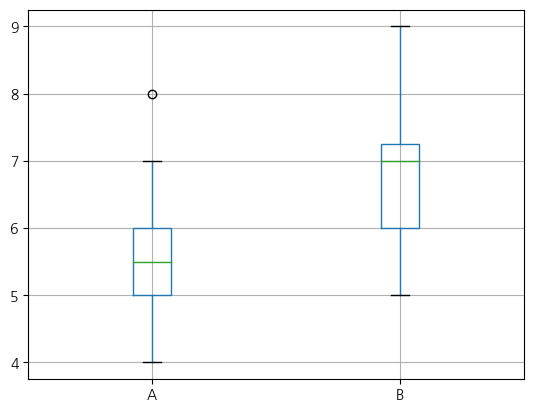

In [82]:
# Group별 boxplot
df.boxplot()

In [83]:
#'cust A' 정규성 검정: Shapiro-Wilk Test
statistic, p = stats.shapiro(df['A'])

In [84]:
print("statistic={}, p-value={}".format(statistic,p))

statistic=0.9094840288162231, p-value=0.06230909377336502


In [85]:
#'cust B' 정규성 검정: Shapiro-Wilk Test
statistic, p = stats.shapiro(df['B'])

In [86]:
print("statistic={}, p-value={}".format(statistic, p))

statistic=0.914249062538147, p-value=0.07683517038822174


※ 'cust A' p-value가 0.06 , 'cust B' p-value가 0.067 이므로, 두 집단 모두 정규성이 있다라고 할 수 있다

In [87]:
# equal variance test 
stats.bartlett(df['A'], df['B'])

BartlettResult(statistic=0.07848064431469153, pvalue=0.7793670509889579)

※ p-value가 0.54이므로, 두 집단의 분산은 같다고 할 수 있다

In [88]:
# 2-Sample t-test
t_result = stats.ttest_ind(df['A'], df['B'], equal_var = True)

# t값,  p값  
t, p = t_result.statistic, t_result.pvalue

In [89]:
# 2-Sample t-test의 t값 p값 출력
print( " 2-Sample t-test ")
print( "  t검정통계량: {} " .format(t)) ; print( " p-value : {} " .format(p))

 2-Sample t-test 
  t검정통계량: -3.3349589531975052 
 p-value : 0.0019136289265287215 


※ 결론 : 유의수준 5%에서 검정결과 P값이 0.001 이므로 고객간에 고객만족도의 차이가 있다 

### 5.연습 (Paired t-test):짝 이루는 집단의 평균 차이 검정
  - 회사원 10명에 대해  영어점수가 학원가기 전의 점수와 학원수강 후에 영어점수가 짝을 이루고 있다. 회사원들의 성적은 학원가기 전후에 대해 차이가 있는지 검정하라. 


In [90]:
# df1, df2를 직접 입력 
df1 = pd.DataFrame({'before': [720, 589, 780, 648, 720, 589, 780, 648, 780, 648]})
df2 = pd.DataFrame({'after': [810, 670, 790, 712, 810, 670, 790, 712, 790, 712]})

In [91]:
# Paired t-test
t_result = stats.ttest_rel(df1['before'], df2['after'])

# t값, p값 
t, p = t_result.statistic, t_result.pvalue

In [92]:
# Paired t-test의 t값 p값 출력
print( "Paired t-test ")
print( " t: {} " .format(t))
print( " p: {} " .format(p))

Paired t-test 
 t: -5.3239144979574125 
 p: 0.00047850760899337117 


※ 결론 : 유의수준 5%에서 검정결과  P값이 "0.0" 이므로 학원 수강 전후의 점수는 차이가 있다고 할 수 있다.

### 6. 연습 (1 Propotion test)
고급강 A제품을 가공하는 국내 고객사는 전체 중에 10% 정도가 품질만족을 나타내고 있다. 
 한 해 동안 A제품의 품질개선의 노력을 통하여 전체고객 중 100여 개의 업체를 표본으로  하여 가공품질을 확인한 결과, 15개의 업체가 품질만족을 나타냈다.  그러면 기존보다 품질만족의 비율에 차이가 있겠는가?   (유의수준=0.05)

In [93]:
# proportion test 패키지
from statsmodels.stats.proportion import proportions_ztest

In [94]:
# 가설 설정
# Ho : p =  0.1
# H1 : p ≠ 0.1      * p^ = x/n = 15/100= 0.15

# 변수 선언 
count = 15
n_obs = 100
value = 0.1

# Proportion test 실행
statistic, p = proportions_ztest(count, n_obs, value)

In [95]:
# Proportion test 결과 출력
print( "1 Proportion test")
print( ' z: {0:0.3f}' .format(statistic))
print( ' p: {0:0.3f}'.format(p))

1 Proportion test
 z: 1.400
 p: 0.161


※ 결론 : 결과적으로 고급강 A제품에 대해 품질개선 결과 기존 대비 사용비율이 차이가 있다고 할 수 없다.

### 7. 연습 (2 Propotion test)
  - 동일한 제품을 생산하는 두 공장에서 불량률을 측정한 결과 아래와 같다.두 공정의 불량률이 같다고 할 수 있는가?(유의수준(a)=0.05) 
    - 공장 1 : N1 = 1000 , X1 = 4  
    - 공장 2 : N2 = 1200 , X2 = 1

In [96]:
# 변수 선언 : 불량수
count = np.array([4, 1])
print(count)

[4 1]


In [97]:
# 변수 선언 : 관측치
n_obs = np.array([1000, 1200])
print(n_obs)

[1000 1200]


In [98]:
# Proportion test 실행
stat, p = proportions_ztest(count, n_obs)

In [99]:
# Proportion test 결과 출력
print("2 Proportion test ")
print('z검정통계량:{0:0.3f}'.format(stat)) ; print('p-value:{0:0.3f}'.format(p))

2 Proportion test 
z검정통계량:1.553
p-value:0.120


※ 결론 : 유의수준 5%에서, p-value> 0.05 이므로 두 공장의 불량률은 차이가 있다고 할 수 없다.

### 8. 연습 (카이제곱 검정, chi-square test) 
   - 근무조별로 철강제품을 생산하고 있는데, 생산 제품의 규격이 3가지 종류가 있다.근무조별로 제품을 생산하는 부하는 차이가 있겠는가? (유의수준 0.05)

In [100]:
# df 생성  
df = pd.DataFrame({'Work_1':[270, 228, 277], 'Work_2':[260, 285, 284],
                   'Work_3':[236, 225, 231], 'Work_4':[234, 262, 208]})

df.head()

,Work_1,Work_2,Work_3,Work_4
0,270,260,236,234
1,228,285,225,262
2,277,284,231,208


In [101]:
# from scipy.stats import chi2_contingency

In [102]:
# chi-square test 실행
chi, pval, dof, expected = stats.chi2_contingency(df)
chi, pval, dof, expected

(13.36627391246374,
 0.03757449387917438,
 6,
 array([[258.33333333, 276.33333333, 230.66666667, 234.66666667],
        [258.33333333, 276.33333333, 230.66666667, 234.66666667],
        [258.33333333, 276.33333333, 230.66666667, 234.66666667]]))

In [103]:
# chi-square test 결과 출력
print( "chi-square test ")
print( ' chisq: {0:0.2f}' .format(chi))
print( ' p-value : {0:0.3f}'.format(pval))
print( ' degree of freedom: {}' .format(dof))
print( ' expected value: \n{}' .format(expected.round(1)))

chi-square test 
 chisq: 13.37
 p-value : 0.038
 degree of freedom: 6
 expected value: 
[[258.3 276.3 230.7 234.7]
 [258.3 276.3 230.7 234.7]
 [258.3 276.3 230.7 234.7]]


※ 결론 :  유의수준 5%에서 근무조별로 제품을 생산하는 부하 차이가 있다고 할 수 있다. 

### 9. 연습 (ANOVA) 
  - OO회사  마케팅실  그룹별 직원들의 TOEIC 성적에 차이가 있는지를 알고 싶다.
  - A Group, B Group, C Group 간의 토익 점수의 차이 여부를 검정하여라. (유의수준(a)=0.05)

In [104]:
# df 입력
df = pd.DataFrame({'A': [892, 623, 721, 678, 723, 790, 720, 670, 690, 771],
                   'B': [721, 821, 910, 678, 723, 790, 711, 790, 745, 891],
                   'C': [760, 915, 888, 721, 894, 834, 841, 912, 845, 889]})
df.head()

,A,B,C
0,892,721,760
1,623,821,915
2,721,910,888
3,678,678,721
4,723,723,894


<Axes: >

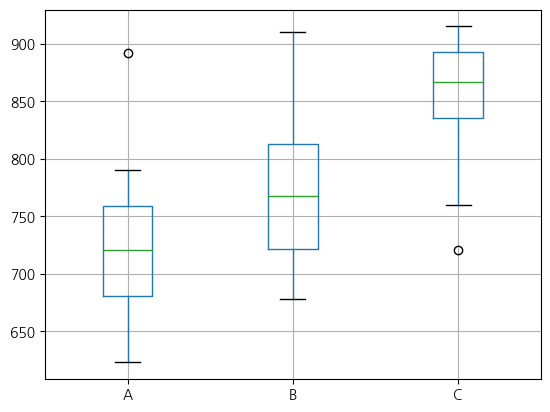

In [105]:
# Group별 boxplot
df.boxplot(['A', 'B', 'C'])

In [106]:
# 'A' 정규성 검정: Shapiro-Wilk Test
statistic, p = stats.shapiro(df['A'])
print("statistic={}, p-value={}".format(statistic,p))

statistic=0.9293239712715149, p-value=0.4412756860256195


In [107]:
# 'B' 정규성 검정: Shapiro-Wilk Test
statistic, p = stats.shapiro(df['B'])
print("statistic={}, p-value={}".format(statistic,p))

statistic=0.924264669418335, p-value=0.39389991760253906


In [108]:
# 'C' 정규성 검정: Shapiro-Wilk Test
statistic, p = stats.shapiro(df['C'])
print("statistic={}, p-value={}".format(statistic,p))

statistic=0.8679400682449341, p-value=0.0945814773440361


In [109]:
# from scipy.stats import bartlett
stats.bartlett(df['A'], df['B'], df['C'])

BartlettResult(statistic=0.29539604297661076, pvalue=0.8626915899335204)

In [110]:
# ANOVA 실행
f_result = stats.f_oneway(df['A'], df['B'], df['C'])

# ANOVA의 f값 p값 저장 
f, p = f_result.statistic, f_result.pvalue

In [111]:
# ANOVA의 f값, p값 출력
print( "One-way ANOVA ")
print( " F통계량 : {} " .format(f))
print( " p-value : {} " .format(p))

One-way ANOVA 
 F통계량 : 7.09567210575343 
 p-value : 0.0033383379006591135 


※ 유의수준 0.05 에서 p-value가 0.003 이므로 마케팅실 그룹별 직원들의 TOEIC 성적에 차이가 있다고 할 수 있다 

### 10.연습(ANOVA)

In [112]:
# df 생성  
df1 = [1, 2, 3, 4, 4, 5, 6, 6, 7, 8]
df2 = [23, 29, 49, 64, 74, 87, 96, 97, 109, 119]

In [113]:
# Correlation Analysis 실행
corr, pval = stats.pearsonr(df1, df2)

In [114]:
# Correlation, p-value 결과 출력 
print( "Correlation Analysis ")
print( ' corr: {0:0.3f}' .format(corr))
print( ' p-value : {0:0.3f}'.format(pval))

Correlation Analysis 
 corr: 0.989
 p-value : 0.000


※ 결론 : 부품수리시간과 부품수간에 "매우 강한 상관성" 이 있다고 할 수 있다